<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/vy-preprocessing/conditional_probabilities_PIP_Embed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install python-fastpip

  Created wheel for python-fastpip: filename=python_fastpip-1.2-cp36-none-any.whl size=3818 sha256=8c83116b4024e37dbdc14eb21497154d0e4ebf278523df0b22ed38a33e455df9
  Stored in directory: /root/.cache/pip/wheels/88/44/d3/0daeba86e0968e23e1ce93b5b8b7ef9b412b0ce1de027f7853
Successfully built python-fastpip


In [2]:
try:
  from tslearn.clustering import TimeSeriesKMeans
except:
  !pip -q install tslearn
  from tslearn.clustering import TimeSeriesKMeans

     |████████████████████████████████| 778kB 5.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#!git clone -l -s https://github.com/Amelrich/Capstone-Fall-2020.git capstone_git_repo

In [4]:
import numpy.random as rd

import pandas as pd
import numpy as np
import seaborn as sns
from fastpip import pip
from collections import Counter
import matplotlib.pyplot as plt
import os
%matplotlib inline
#os.chdir('/content/drive/My Drive/Capstone - JPM')
from yellowbrick.cluster import KElbowVisualizer
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import asarray
from numpy import save
from itertools import product
from collections import defaultdict

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
os.chdir('/content/drive/My Drive/Capstone - JPM/capstone_git_repo')
from TS_utils import TS_generator
from TS_utils import MedianScaler, DCT_lowpass_filter
from TS_utils import KMedians
from TS_utils import Synthetic_TS_generator
#stg = Synthetic_TS_generator(noise=False)
#X_synthetic = stg.get_array()

In [6]:
try:
  from google.colab import files
  !wget -q https://github.com/Amelrich/Capstone-Fall-2020/archive/master.zip
  !unzip -q master.zip
  !mv Capstone-Fall-2020-master/data/ data/
  !rm -rf master.zip Capstone-Fall-2020-master/
except:
  print("only in Colab")

In [7]:
# Creating data

context_scale = 60
current_scale = 20
gen = TS_generator(nb_timeseries=1000, chunk_size=context_scale)
context_matrix = gen.get_array()
#context_matrix = X_synthetic
os.chdir('/content/drive/My Drive/Capstone - JPM')

# Helper functions

In [29]:
def reduce_dimension(context, dim):
    embed_matrix = np.empty(shape=[0, dim])
    # Going through each row of the context scale and reduce its dimension
    for i in range(context.shape[0]):
        x = np.arange(1, context.shape[1] + 1)  
        y = context[i,:]
        sample = [(a,b) for a, b in zip(x,y)]
        reduce_sample = pip(sample, dim)
        result = [a[1] for a in reduce_sample]
        
        embed_matrix = np.append(embed_matrix, np.asarray(result).reshape(1,-1), axis =0)
    return embed_matrix

def preprocessing(x):
  context_matrix_scale = np.transpose(MinMaxScaler().fit_transform(np.transpose(x.copy())))
  context_matrix_pip = reduce_dimension(context_matrix_scale.copy(), 30)
  context_matrix_smooth = DCT_lowpass_filter().fit_transform(context_matrix_pip.copy())
  print("Preprocessing Done")
  return context_matrix_smooth

def clustering(x):
  num_clus = 6
  model = TimeSeriesKMeans(n_clusters=num_clus, max_iter=5,random_state=0).fit(x)
  return model.predict(x)


def preprocessing_clustering(x):
  print("Starting to cluster...")
  x_preprocessed = preprocessing(x)
  y_pred = clustering(x_preprocessed)
  print("Finished!")
  return y_pred

In [30]:
y_pred = preprocessing_clustering(context_matrix)

Starting to cluster...
Preprocessing Done
Finished!


/usr/local/lib/python3.6/dist-packages/tslearn/utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [31]:
y_pred.shape

(1000,)

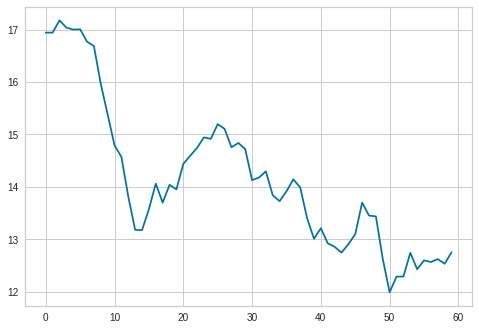

In [32]:
plt.plot(context_matrix[0]);

Preprocessing Done


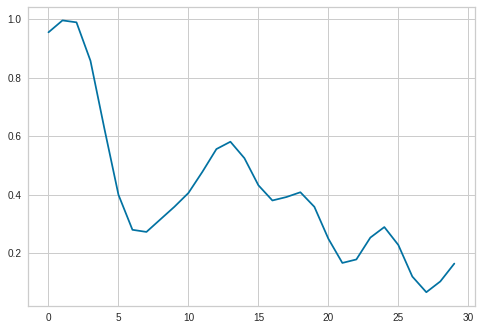

In [33]:
plt.plot(preprocessing(context_matrix)[0]);